In [1]:
import pandas as pd
MODALITY = 'asymmetry'
IMPUTE_ID = 'mean_imputed'
SUBSAMPLED_ID = 'not_subsampled'
PARTITIONS_DIR = f"../../results/{MODALITY}/visualizeCCAOnPheno/STAGE00DATA/{IMPUTE_ID}/{SUBSAMPLED_ID}/props"
RESULTS_DIR = f"../../results/{MODALITY}/FUMA gene2func/joinedDatasets/{IMPUTE_ID}/{SUBSAMPLED_ID}"

/opt/anaconda/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def load_df(name):
    df = None
    for par in [1,4,5,6,7]:
        tab = pd.read_csv(f"{RESULTS_DIR}/par{par:02d}/{name}.txt",sep='\t')
        tab['partition'] = par
        if df is None:
            df = tab
        else:
            df = pd.concat([df, tab])
    return df
functions_df = load_df("GS")
deg_df = load_df("gtex_v8_ts_DEG")

In [3]:
functions_df.shape

(625, 9)

In [4]:
functions_df.head()

,Category,GeneSet,N_genes,N_overlap,p,adjP,genes,link,partition
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION,533,10,7.796339e-09,0.000057,TUBA1B:TUBA1A:TUBA1C:CHMP1A:SPIRE2:TUBB3:TUBB3...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
1,GO_bp,GO_CYTOSKELETON_ORGANIZATION,1293,13,5.802548e-08,0.000213,TUBA1B:TUBA1A:TUBA1C:DAAM1:CHMP1A:CDK10:SPIRE2...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
2,GO_bp,GO_MICROTUBULE_BASED_PROCESS,731,10,1.495837e-07,0.000366,TUBA1B:TUBA1A:TUBA1C:CHMP1A:SPIRE2:TUBB3:TUBB3...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
3,GO_bp,GO_REGULATION_OF_CELLULAR_COMPONENT_BIOGENESIS,909,9,9.334853e-06,0.013884,DACT1:CHMP1A:CDK10:SPIRE2:DEF8:MAPT:EMILIN1:PR...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
4,GO_bp,GO_ORGANELLE_LOCALIZATION,685,8,9.444920e-06,0.013884,TUBA1A:CHMP1A:SPIRE2:DEF8:CRHR1:MAPT:NSF:PREB,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1


In [5]:
functions_df.Category.unique()

array(['GO_bp', 'GWAScatalog', 'Chemical_and_Genetic_pertubation',
       'GO_cc', 'Immunologic_signatures', 'Positional_gene_sets',
       'Wikipathways', 'GO_mf', 'Curated_gene_sets', 'KEGG', 'Reactome',
       'Canonical_Pathways', 'Cancer_modules', 'Oncogenic_signatures',
       'Computational_gene_sets', 'TF_targets'], dtype=object)

In [6]:
functions_df.sort_values('adjP').groupby(['Category','partition']).first()

GeneSet  \
Category                         partition                                                      
Cancer_modules                   6                                                 MODULE_253   
Canonical_Pathways               1           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
                                 6           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
Chemical_and_Genetic_pertubation 1                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 4                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 5                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 6                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 7                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
Computational_gene_sets          6                                                 MODULE_196   
Curated_gene_sets                1                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 4                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 5                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 6                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 7                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
GO_bp                            1                   GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION   
                                 4                               GO_MICROTUBULE_BASED_PROCESS   
                                 5                   GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION   
                                 6                   GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION   
GO_cc                            1                                GO_MICROTUBULE_CYTOSKELETON   
                                 5                                GO_MICROTUBULE_CYTOSKELETON   
                                 6                                             GO_MICROTUBULE   
GO_mf                            1                                         GO_TUBULIN_BINDING   
                                 5                                         GO_TUBULIN_BINDING   
                                 6                  GO_STRUCTURAL_CONSTITUENT_OF_CYTOSKELETON   
GWAScatalog                      1                             Red vs. brown/black hair color   
                                 4             Handedness (Right-handed vs. non-right-handed)   
                                 5                             Red vs. brown/black hair color   
                                 6               Handedness (Left-handed vs. non-left-handed)   
                                 7                             Red vs. brown/black hair color   
Immunologic_signatures           1          GSE24634_IL4_VS_CTRL_TREATED_NAIVE_CD4_TCELL_D...   
                                 6                      GOLDRATH_NAIVE_VS_MEMORY_CD8_TCELL_UP   
KEGG                             1                 KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION   
                                 6                 KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION   
Oncogenic_signatures             6                                        CYCLIN_D1_KE_.V1_DN   
Positional_gene_sets             1                                                   chr16q24   
                                 4                                                   chr16q24   
                                 5                                                   chr16q24   
                                 6                                                   chr16q24   
                                 7                                                   chr16q24   
Reactome                         1           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
            

In [7]:
functions_per_partition_df = functions_df.sort_values('adjP').query('(Category=="GWAScatalog") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
functions_per_partition_df

partition,1,4,5,6,7
GeneSet,,,,,
Alcohol use disorder (total score),1.876031e-08,1.216020e-08,7.648911e-09,1.940689e-08,1.552551e-08
Alzheimer's disease in APOE e4- carriers,8.806281e-05,2.893606e-04,4.238952e-05,3.325021e-04,2.881685e-04
Atrial fibrillation,NaN,3.195294e-02,NaN,NaN,NaN
Blond vs. brown/black hair color,4.285642e-04,9.489469e-03,1.829183e-04,NaN,9.030972e-06
Brown vs. black hair color,6.493755e-05,2.269067e-04,3.510215e-05,2.607590e-04,2.099590e-06
Cognitive ability,NaN,2.879942e-02,NaN,3.025530e-02,2.909163e-02
Cognitive function,NaN,2.307840e-03,NaN,2.231056e-03,2.119504e-03
Dentate gyrus granule cell layer volume,NaN,NaN,4.452758e-05,NaN,NaN
Dentate gyrus molecular layer volume,NaN,NaN,5.306849e-05,NaN,NaN


In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpecFromSubplotSpec
plt.rcParams['font.family'] = 'Serif'
def create_intensity_table_plot(df, color_labels=None):
    vals = np.around(-np.log10(df.values),2)
    print(vals.shape)
    if color_labels is None:
        norm = plt.Normalize(np.nanmin(vals), np.nanmax(vals))
        colours = plt.cm.coolwarm(norm(vals))
    else:
        colours = plt.cm.coolwarm(color_labels)
    fig, ax0 = plt.subplots(figsize=(20,3))
    ax0.get_xaxis().set_visible(False)
    ax0.get_yaxis().set_visible(False)
    spec = GridSpecFromSubplotSpec(1,5, subplot_spec=ax0,wspace=0,hspace=0)
    print(colours.shape)
    colours[np.isnan(vals)] = [1,1,1,1]
    str_vals = [[x if np.isfinite(x) else '' for x in y ] for y in vals]
    the_table=ax0.table(cellText=str_vals, rowLabels=df.index, colLabels=['Partition ' + str(i) for i in df.columns], 
                    loc='bottom', cellLoc='center',
                        cellColours=colours)
    the_table.set_fontsize(20)
    the_table.scale(1, 4)
    for i in range(len(df.columns)):
        ax1 = fig.add_subplot(spec[0,i], xticks=[], yticks=[])
        with Image.open(PARTITIONS_DIR + '/' + str(df.columns[i]) + '.png') as im:
            ax1.imshow(im)
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
    plt.subplots_adjust(left=0.2, bottom=0.2)
        
    return fig

(48, 5)
(48, 5, 4)


/opt/anaconda/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


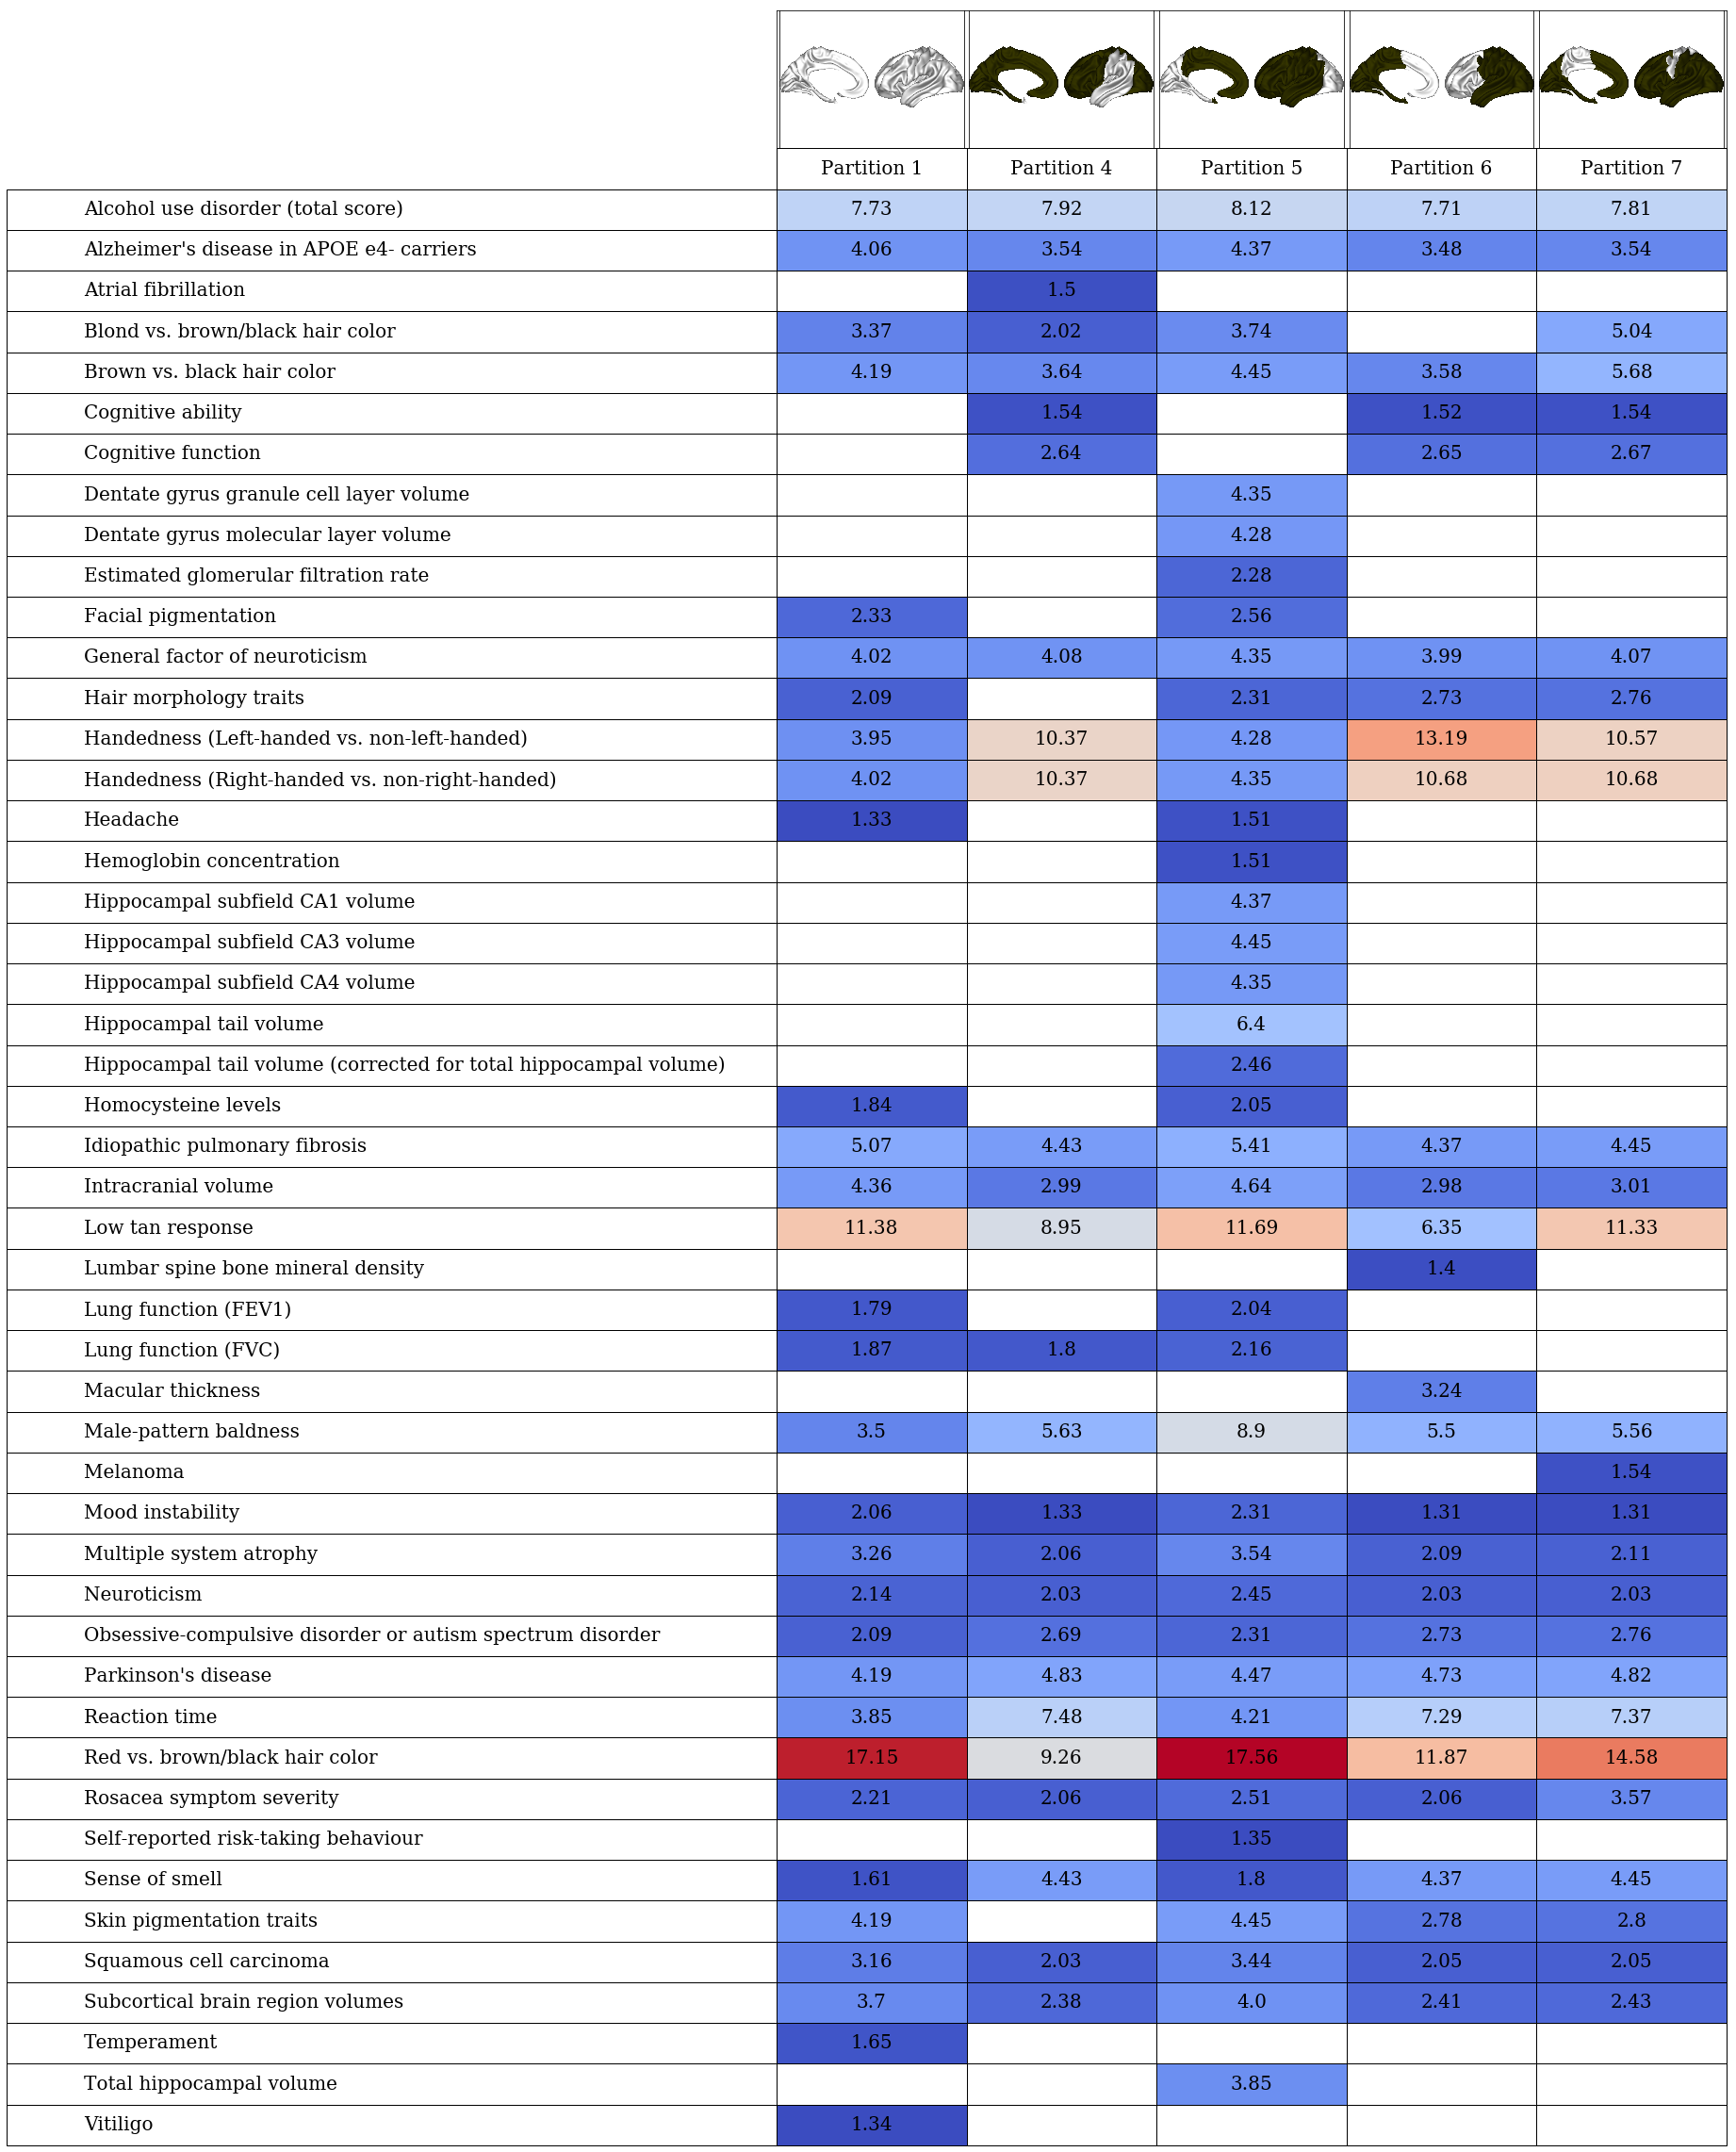

In [21]:
functions_fig = create_intensity_table_plot(functions_per_partition_df)

In [10]:
deg_df.head()

,Category,GeneSet,N_genes,N_overlap,p,adjP,genes,partition
0,DEG.up,Adipose_Subcutaneous,2127,1,0.983748,1.0,ENSG00000204291,1
1,DEG.up,Adipose_Visceral_Omentum,1774,2,0.851401,1.0,ENSG00000204291:ENSG00000155926,1
2,DEG.up,Adrenal_Gland,1549,0,1.000000,1.0,NaN,1
3,DEG.up,Artery_Aorta,2768,5,0.598341,1.0,ENSG00000204291:ENSG00000100592:ENSG0000016561...,1
4,DEG.up,Artery_Coronary,2052,6,0.183052,1.0,ENSG00000204291:ENSG00000100592:ENSG0000016561...,1


In [11]:
deg_per_partition_up_df = deg_df.sort_values('adjP').query('(Category=="DEG.up") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
deg_per_partition_up_df['type'] = 'up'
deg_per_partition_down_df = deg_df.sort_values('adjP').query('(Category=="DEG.down") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
deg_per_partition_down_df['type'] = 'down'
deg_per_partition_twoside_df = deg_df.sort_values('adjP').query('(Category=="DEG.twoside") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
deg_per_partition_twoside_df['type'] = 'twoside'
df = pd.concat([deg_per_partition_up_df,deg_per_partition_twoside_df,deg_per_partition_down_df],axis=0,sort=True)
df.columns = [str(x) for x in df.columns]
df = df.sort_index(axis=1)
df = df.sort_index(axis=0)
df

,1,4,5,6,7,type
GeneSet,,,,,,
Brain_Cerebellar_Hemisphere,NaN,0.008082,0.042463,NaN,0.002785,up
Brain_Cerebellum,NaN,0.031497,0.010622,NaN,0.002155,up
Cells_Cultured_fibroblasts,NaN,NaN,0.010730,NaN,NaN,down
Esophagus_Gastroesophageal_Junction,NaN,NaN,NaN,0.042868,NaN,down
Nerve_Tibial,NaN,NaN,NaN,NaN,0.030706,down
Thyroid,NaN,NaN,0.038455,NaN,NaN,twoside
Uterus,0.009116,NaN,NaN,0.017920,0.022131,down


In [12]:
labels = np.zeros(df.shape)
labels[df['type']=='up',:] = 1
labels[df['type']=='twoside',:] = 0.5

(7, 5)
(7, 5, 4)


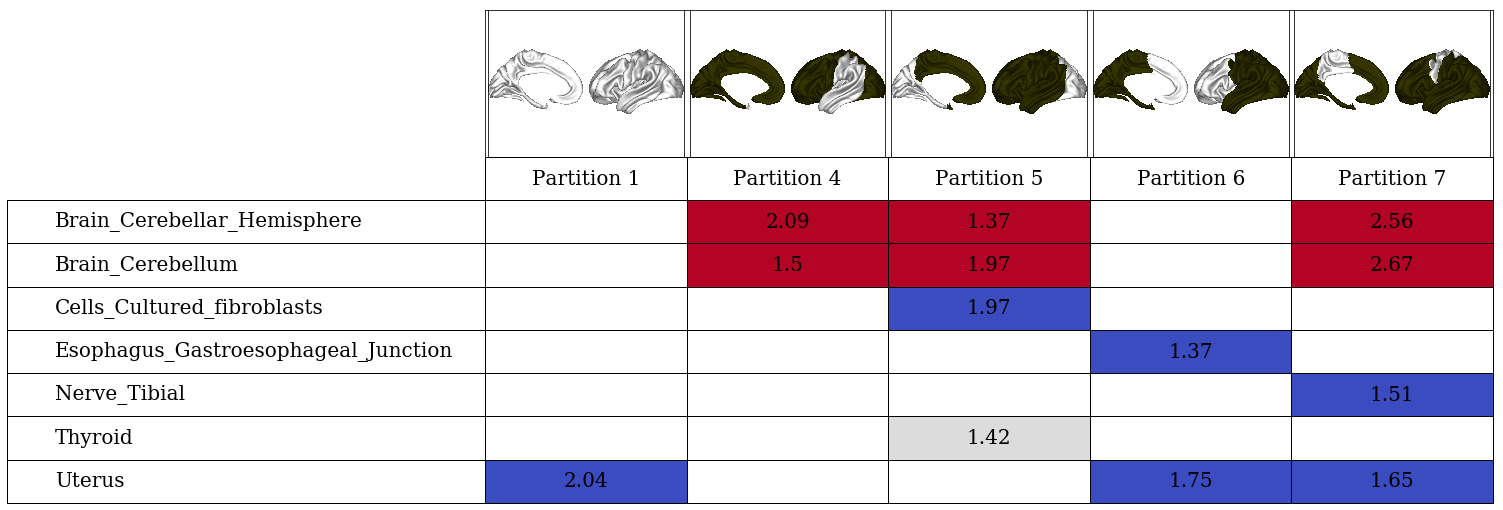

In [22]:
deg_fig = create_intensity_table_plot(df.drop(columns='type'), labels[:,:-1])

In [23]:
import os
OUTPUT_DIR = RESULTS_DIR+'/partitionsSummary/'
os.makedirs(OUTPUT_DIR,exist_ok=True)

deg_fig.savefig(OUTPUT_DIR + 'DEG.svg', bbox_inches="tight")
functions_fig.savefig(OUTPUT_DIR + 'GWASCatalog.svg', bbox_inches="tight")